In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [10]:
mainData = pd.read_csv('Maths.csv')
mainData.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,grades
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,D
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,D
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,C
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,B
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,C


In [4]:
mainData.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [5]:
finalgrade = pd.DataFrame(mainData['G3'])
finalgrade.shape

(395, 1)

<AxesSubplot:xlabel='G3', ylabel='count'>

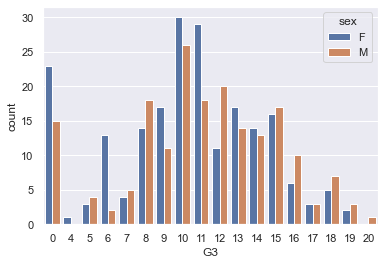

In [14]:
sb.countplot(data=mainData, x="G3", hue="sex")

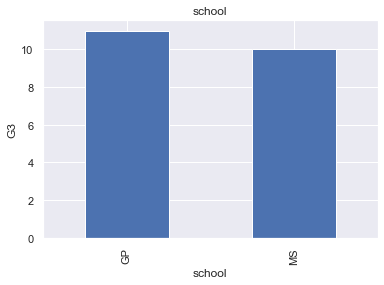

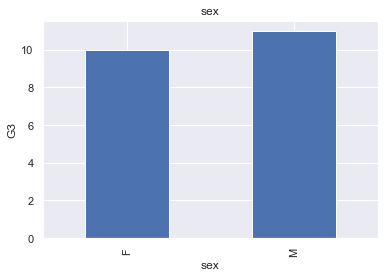

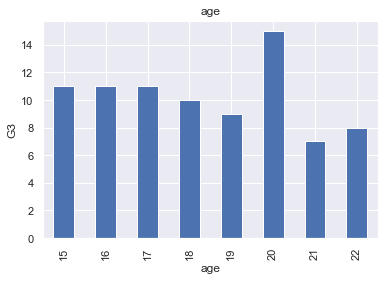

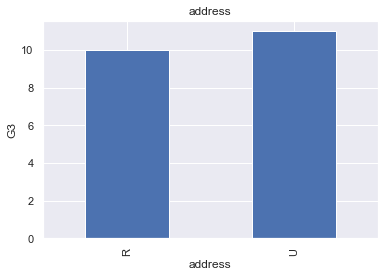

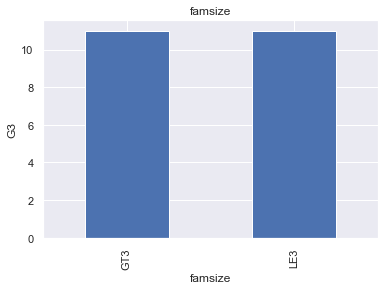

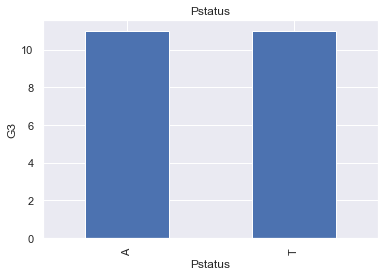

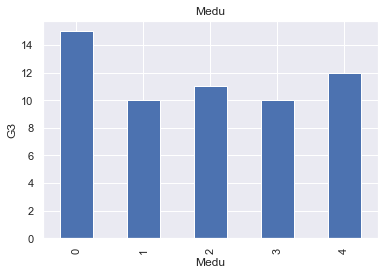

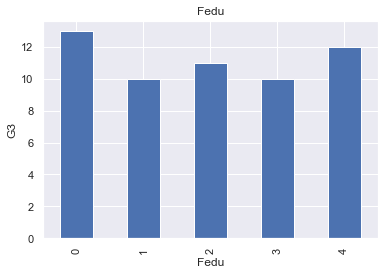

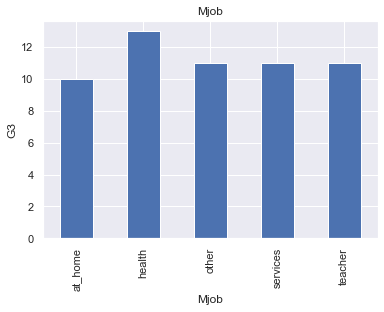

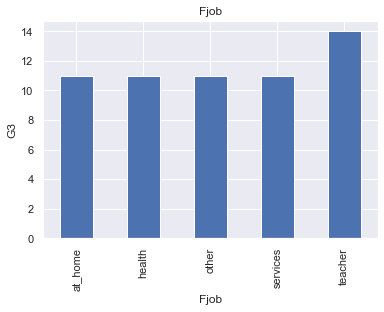

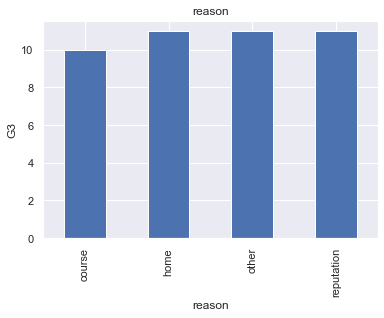

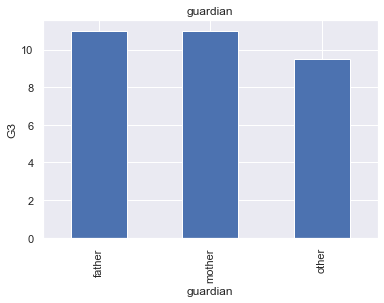

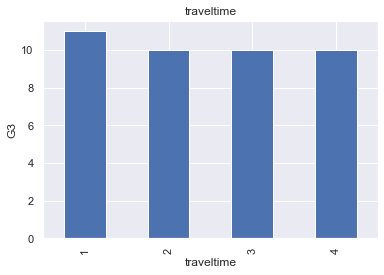

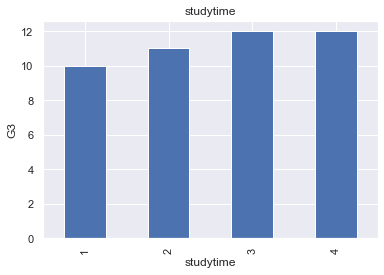

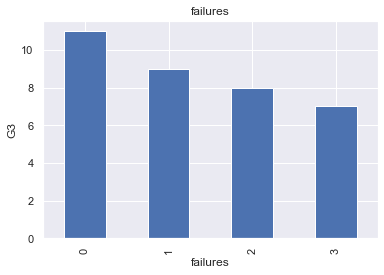

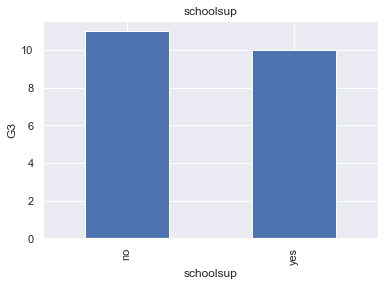

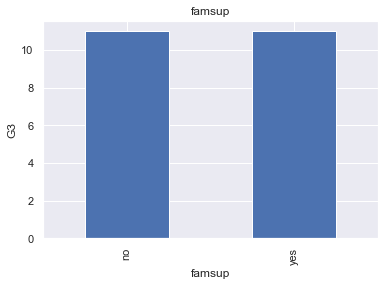

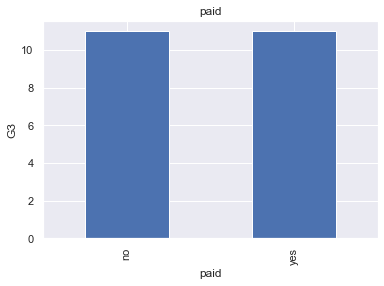

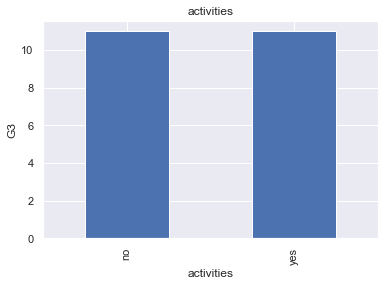

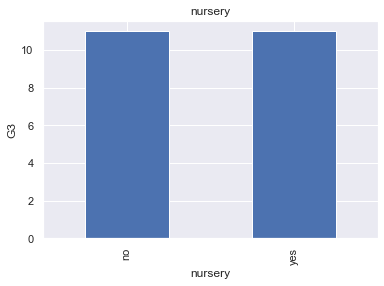

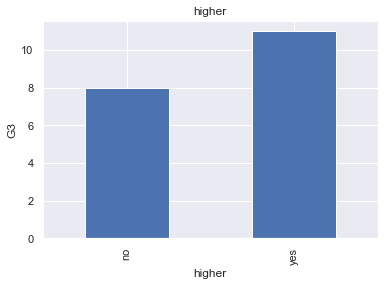

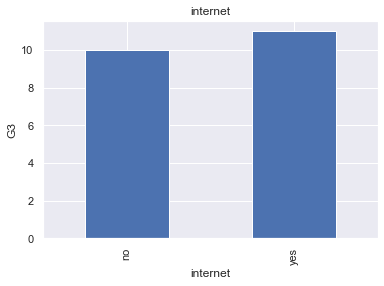

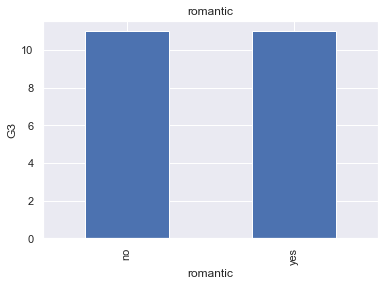

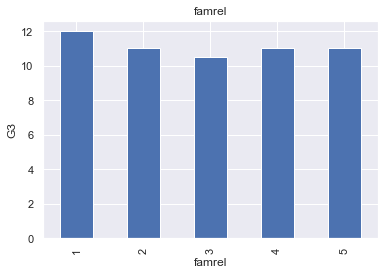

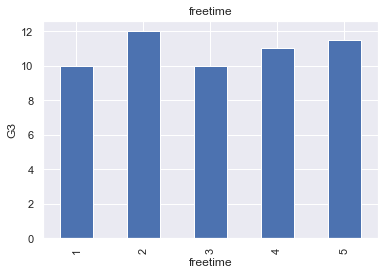

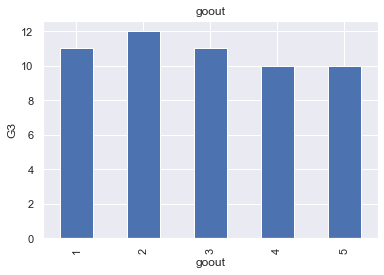

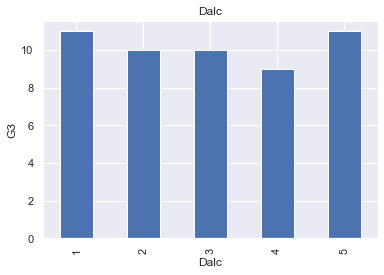

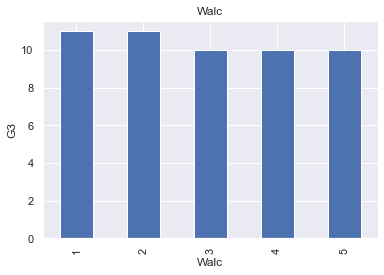

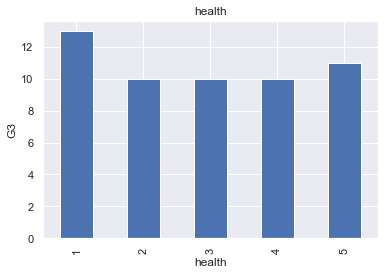

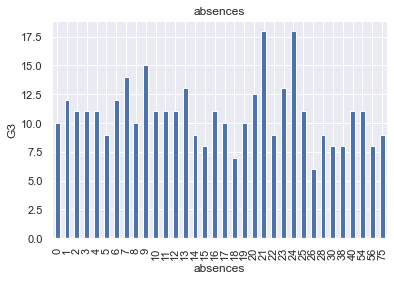

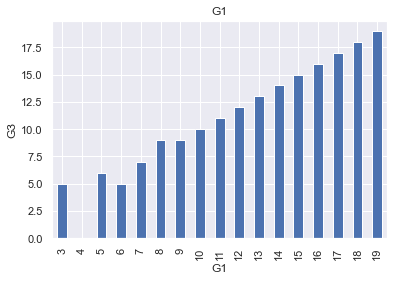

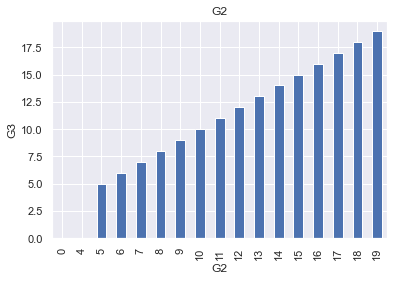

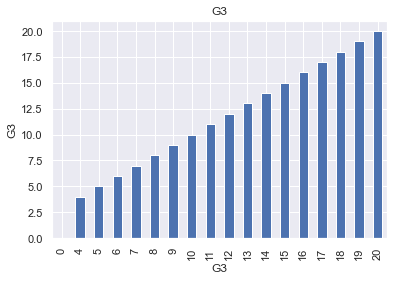

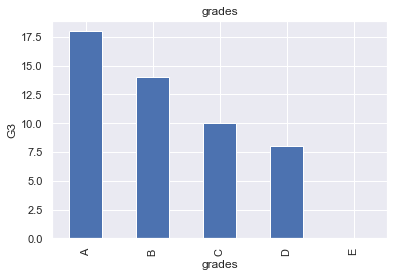

In [12]:
# finding relationship between discrete variables and G3

for features in mainData:
    data = mainData.copy()
    data.groupby(features)['G3'].median().plot.bar()
    plt.xlabel(features)
    plt.ylabel('G3')
    plt.title(features)
    plt.show()

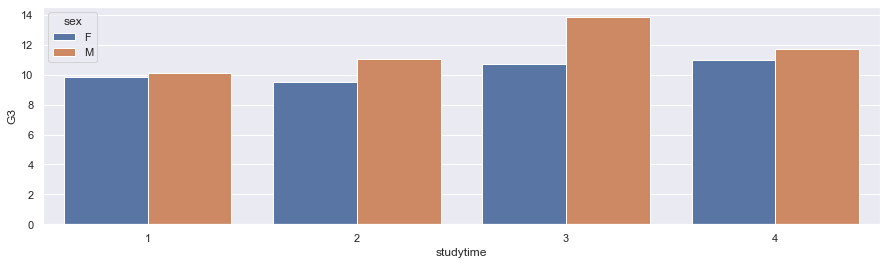

In [22]:
#studytime vs g3
fig = plt.figure(figsize=[15,4])
sb.barplot(x='studytime', y='G3', hue='sex', data=mainData, ci=None)
plt.show()

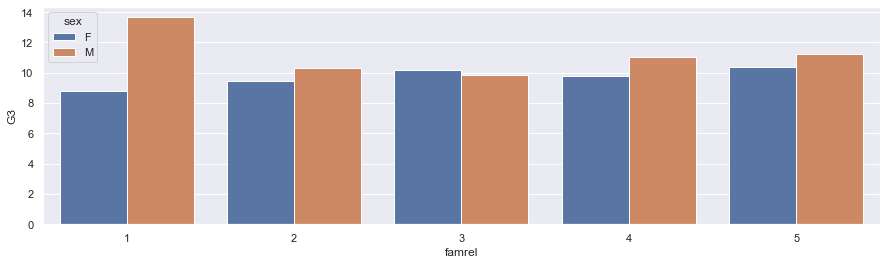

In [23]:
#famrel vs g3
fig = plt.figure(figsize=[15,4])
sb.barplot(x='famrel', y='G3', hue='sex', data=mainData, ci=None)
plt.show()

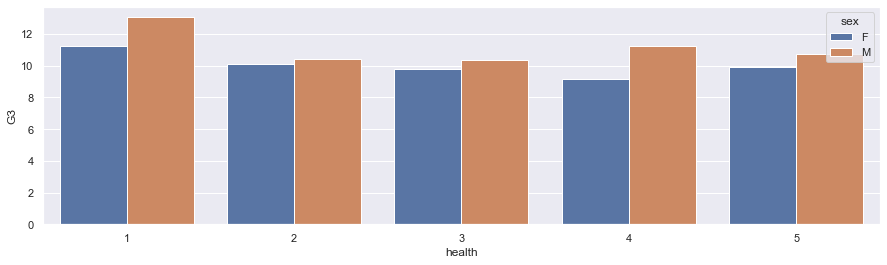

In [24]:
#health vs g3
fig = plt.figure(figsize=[15,4])
sb.barplot(x='health', y='G3', hue='sex', data=mainData, ci=None)
plt.show()

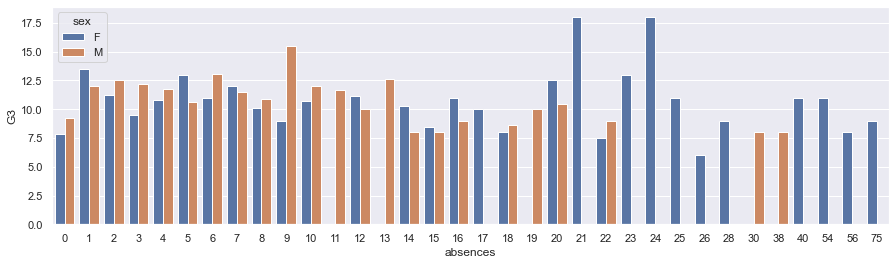

In [25]:
#studytime vs g3
fig = plt.figure(figsize=[15,4])
sb.barplot(x='absences', y='G3', hue='sex', data=mainData, ci=None)
plt.show()

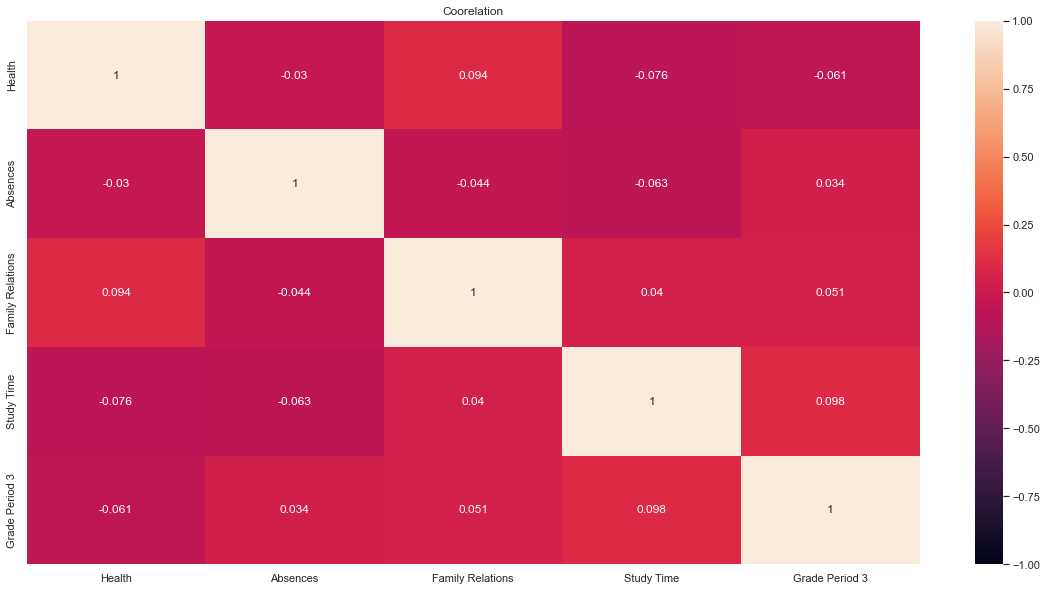

In [27]:
tmp = mainData[['health', 'absences', 'famrel', 'studytime','G3']].corr()
fig, ax = plt.subplots(figsize=(20, 10))
# fig, ax = plt.subplots()
sb.heatmap(data=tmp,vmin = -1, vmax = 1, annot=True)
ax.set_title("Coorelation")
ax.set_xticklabels(("Health", "Absences", "Family Relations", "Study Time", "Grade Period 3"))
ax.set_yticklabels(("Health", "Absences", "Family Relations", "Study Time", "Grade Period 3"))
plt.show()